In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("Why are employees leaving.csv")  #Loading file into my Notebook
df.head()

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Division,salary
0,1,0.38,0.53,2,157,3,0,1,0,sales,low
1,2,0.80,0.86,5,262,6,0,1,0,sales,medium
2,3,0.11,0.88,7,272,4,0,1,0,sales,medium
3,4,0.72,0.87,5,223,5,0,1,0,sales,low
4,5,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#Understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Division               14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [7]:
# Categorical Data Analysis => Understanding the string type columns (Division and Salary)
df['Division'].value_counts()

Division
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [8]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [9]:


# Setting a basic style for seaborn
sns.set(style="whitegrid")

<Figure size 1200x600 with 0 Axes>

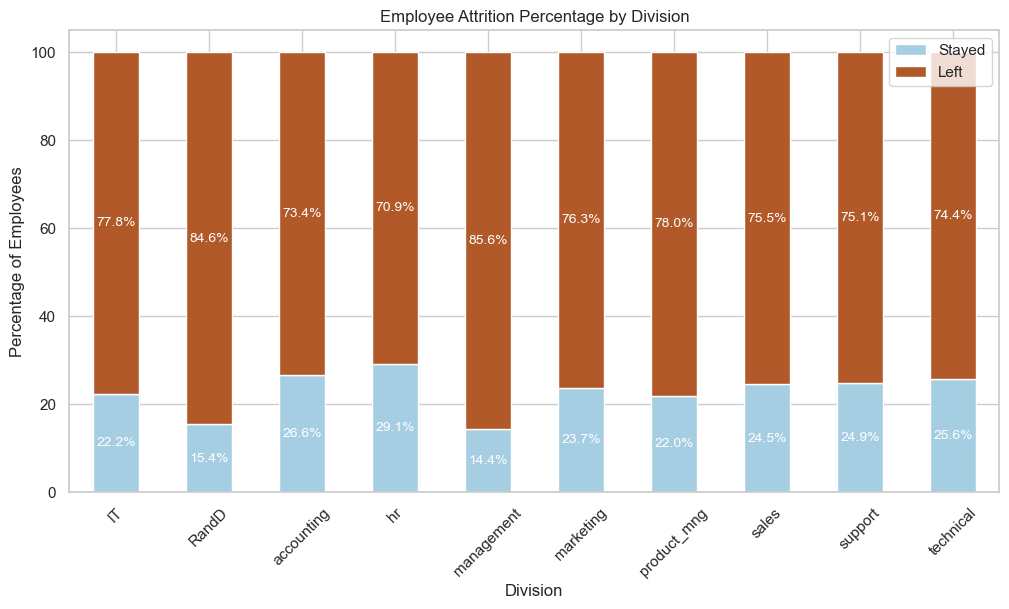

In [10]:
# Division impact on attrition

plt.figure(figsize=(12, 6))

# Get counts of employees in each category
division_counts = df.groupby(['Division', 'left']).size().unstack()

# Convert counts to percentages
division_percent = division_counts.div(division_counts.sum(axis=1), axis=0) * 100

division_percent = division_percent[[1, 0]]

# Plot the stacked bar chart with percentages
stacked_bar = division_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="Paired")

for bar in stacked_bar.containers:
    stacked_bar.bar_label(bar, fmt='%.1f%%', label_type='center', fontsize=10, color='white')

plt.xticks(rotation=45)  # Rotate labels for readability
plt.title("Employee Attrition Percentage by Division")
plt.xlabel("Division")
plt.ylabel("Percentage of Employees")
plt.legend(["Stayed", "Left"])  # Legend to distinguish categories
plt.show()

<Figure size 1200x600 with 0 Axes>

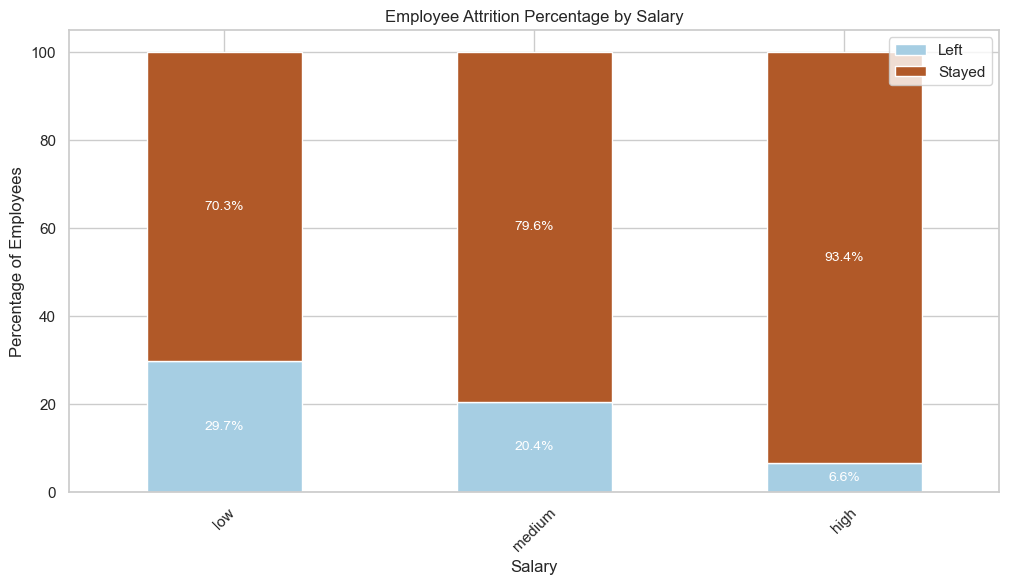

In [11]:
# Salary class impact on the attrition

plt.figure(figsize=(12, 6))

# Get counts of employees in each category
division_counts = df.groupby(['salary', 'left']).size().unstack()

# Convert counts to percentages
division_percent = division_counts.div(division_counts.sum(axis=1), axis=0) * 100

division_percent = division_percent[[1, 0]]

salary_order = ["low", "medium", "high"]
division_percent = division_percent.loc[salary_order]

# Plot the stacked bar chart with percentages
stacked_bar = division_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="Paired")

for bar in stacked_bar.containers:
    stacked_bar.bar_label(bar, fmt='%.1f%%', label_type='center', fontsize=10, color='white')

plt.xticks(rotation=45)  # Rotate labels for readability
plt.title("Employee Attrition Percentage by Salary")
plt.xlabel("Salary")
plt.ylabel("Percentage of Employees")
plt.legend(["Left", "Stayed"])  # Legend to distinguish categories
plt.show()

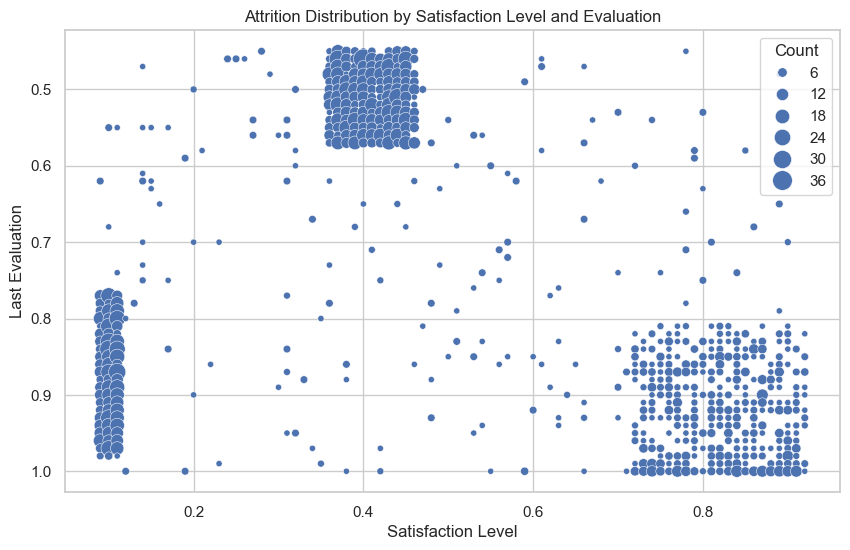

In [12]:
# Clustering based on Satisfaction level and Evaluation for those people who left

#First we create a subset that has only those who left
left_df = df[df['left'] == 1]

# Group by satisfaction_level and last_evaluation, then count occurrences
scatter_data = left_df.groupby(['satisfaction_level', 'last_evaluation']).size().reset_index(name='count')

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='satisfaction_level', y='last_evaluation', size='count', sizes=(20, 200))

plt.gca().invert_yaxis()

# Labels and title
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Attrition Distribution by Satisfaction Level and Evaluation')
plt.legend(title='Count', loc='upper right')

plt.show()


/var/folders/n8/sjn78y6j62bbb0w0_cywfkk40000gn/T/ipykernel_91175/1526006122.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_df["cluster_label"] = left_df.apply(assign_cluster, axis=1)


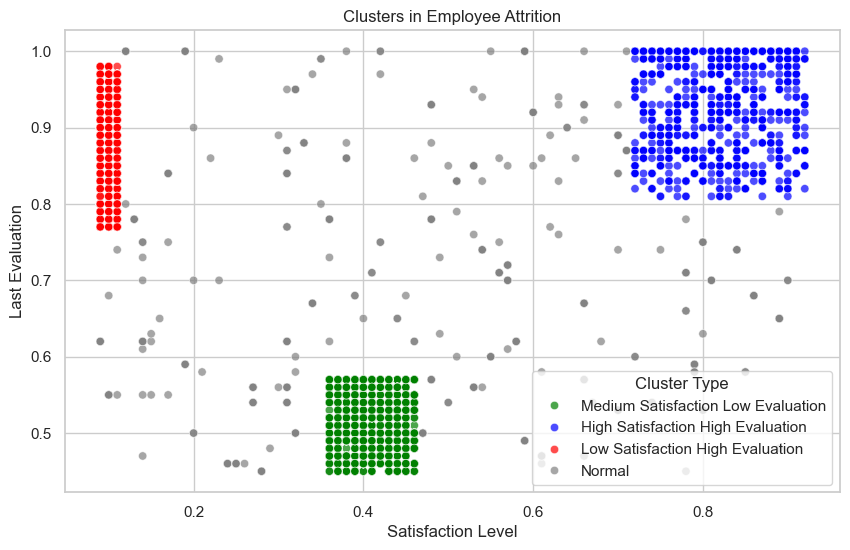

In [13]:
# Categorising the 3 main clusters observed in the scatter plot

##Defining our Cluster Names

def assign_cluster(row):
    if row["satisfaction_level"] >= 0.72 and row["last_evaluation"] >= 0.8:
        return "High Satisfaction High Evaluation"
    elif row["satisfaction_level"] <= 0.11 and row["last_evaluation"] >= 0.75:
        return "Low Satisfaction High Evaluation"
    elif row["satisfaction_level"] >= 0.35 and row["satisfaction_level"] <= 0.46 and row["last_evaluation"] <= 0.57:
        return "Medium Satisfaction Low Evaluation"
    else:
        return "Normal"

left_df["cluster_label"] = left_df.apply(assign_cluster, axis=1)

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=left_df, 
    x="satisfaction_level", 
    y="last_evaluation", 
    hue="cluster_label", 
    palette={"High Satisfaction High Evaluation": "blue", 
             "Low Satisfaction High Evaluation": "red", 
             "Medium Satisfaction Low Evaluation": "green",
             "Normal": "grey"
            },
    alpha=0.7
)

plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.title("Clusters in Employee Attrition")
plt.legend(title="Cluster Type")
plt.show()
